<h1 align="center">Scientific Programming in Python</h1>
<h2 align="center">Actividad 7</h2> 

In [1]:
import numba
import numexpr as ne
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

En la presente actividad simularemos y visualizaremos un sistema dinámico 2-dimensional simple. Para ello resolveromos una EDO numéricamente, utilizando el _método de Euler_. 

Consideremos un sistema de $N$ partículas $(x_i(t), y_i(t))$ en el dominio $[0,1]\times[0,1]$, cuyo movimiento se rige por las siguientes ecuaciones (EDOs autónomas):

\begin{align}
\frac{dx}{dt} &= \text{tanh}(x^2+y^2), \text{ con } x(0)=x_0, \\
\frac{dy}{dt} &= \text{tanh}(x^2+y^2), \text{ con } y(0)=y_0 \\
\end{align}

El _método de Euler_ para resolver este problema numéricamente, consiste en realizar la siguiente aproximación para la derivada:

\begin{align}
\frac{x_{i+1}-x_i}{\Delta t} =  \text{tanh}(x_i^2+y_i^2) \rightarrow x_{i+1} = x_i + \Delta t \cdot \text{tanh}(x_i^2+y_i^2) \\
\frac{y_{i+1}-y_i}{\Delta t} =  \text{tanh}(x_i^2+y_i^2) \rightarrow y_{i+1} = y_i + \Delta t \cdot \text{tanh}(x_i^2+y_i^2)
\end{align}

ocupando las condiciones iniciales $x_0$ e $y_0$ como puntos de partida. Aquí $\Delta t$ (_time step_) es un parámetro definido por usted, y usualmente toma valores pequeños.

__Notar__ que esta ecuación es válida para una partícula, y por tanto para simular un sistema de $N$ de estas, es necesario realizar esta actualización para cada partícula $(x_i,y_i)$ con $i \in [1,N]$.

__Se solicita que realice lo siguiente__:
1. Genere un conjunto de `100` puntos aleatoriamente distribuidos en el espacio $[0,1]\times[0,1]$ (Seran usados como posiciones iniciales del sistema). Grafíque el conjunto de puntos obtenidos.
2. Realizar un gráfico de la función que define el comportamiento del sistema: $f(z) = \text{tanh}(z^2)$ (gráfico unidimensional).
3. Desarrollar la función `simular(x0, y0, dt, tf)` que reciba los `np.ndarray` con las coordenadas iniciales `x0` e `y0` del sistema, el _time step_ `dt` (seleccione un valor pequeño $\sim 0.01$) y el tiempo final de simulación. Esta función debe graficar el conjunto de puntos del sistema, en su tiempo final.
4. Usando `interact` desarrolle un _widget_ para visualizar interactivamente distintos estados finales del sistema (distintos `tf`).

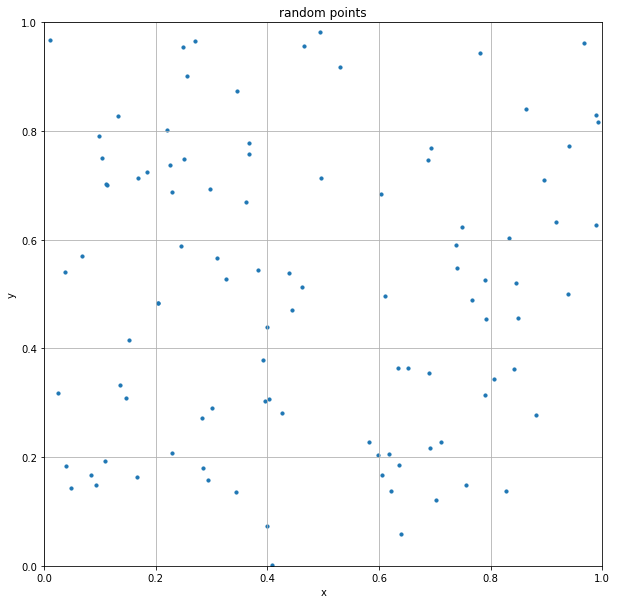

In [2]:
X = np.random.random(100)
Y = np.random.random(100)

plt.figure(figsize=(10,10))
plt.scatter(X, Y, marker='o', s=10)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('random points')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

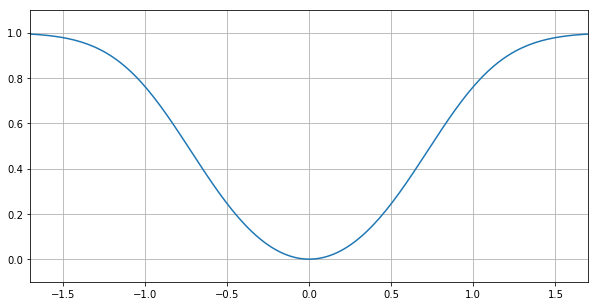

In [3]:
x = np.linspace(-10,10,1000)
y = np.tanh(x**2)

plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.grid()
plt.xlim(-1.7,1.7)
plt.ylim(-0.1,1.1)
plt.show()

In [4]:
def next_x(x, y, dt):
    return x + dt*np.tanh(x**2 + y**2)

def next_y(x, y, dt):
    return y + dt*np.tanh(x**2 + y**2)

def simular(x, y, dt, tf):
    x = np.array(x)
    y = np.array(y)
    times = np.arange(0,tf,dt)
    for i in np.arange(len(times)):
        x = next_x(x, y, dt)
        y = next_y(x, y, dt)
        
    plt.figure(figsize=(10,5))
    plt.scatter(x, y, marker='o', s=10)
    plt.grid()
    plt.xlim(0,6.5)
    plt.ylim(0,6.5)
    plt.show()

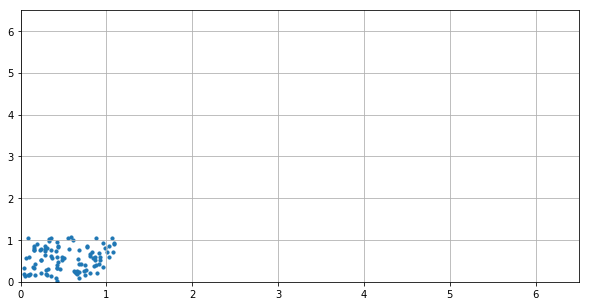

In [5]:
from ipywidgets import interact, fixed, FloatSlider

interact(simular, x=fixed(X), y=fixed(Y), dt=fixed(0.001), tf=FloatSlider(min=0.1,max=5,step=0.01,value=0.5))